# PROYECTO FINAL

Importamos las librerías y le cambiamos el encabezado para eliminar los espacios con los que viene el .csv en los títulos de las columnas.

In [1]:
import pandas as pd
import matplotlib.pyplot as pyplt
import seaborn as sns
from seaborn import pairplot

URL_DESCARGA = "/home/carlos/Proyectos/Python/ProyectoFinal/ProyectoBigData/datosContaminacionMadrid/madrid-air-quality.csv"
dfContaminacion = pd.read_csv(URL_DESCARGA)
columnNames = ['date', 'pm25', 'pm10','o3','no2','so2','co']
dfContaminacion.columns = columnNames

dfContaminacion ['date'] = pd.to_datetime(dfContaminacion['date'], format='%Y-%m-%d', errors='coerce')
dfContaminacion ['pm25'] = pd.to_numeric(dfContaminacion['pm25'], errors='coerce')
dfContaminacion ['pm10'] = pd.to_numeric(dfContaminacion['pm10'], errors='coerce')
dfContaminacion ['o3'] = pd.to_numeric(dfContaminacion['o3'], errors='coerce')
dfContaminacion ['no2'] = pd.to_numeric(dfContaminacion['no2'], errors='coerce')
dfContaminacion ['so2'] = pd.to_numeric(dfContaminacion['so2'], errors='coerce')
dfContaminacion ['co'] = pd.to_numeric(dfContaminacion['co'], errors='coerce')

Examinamos nuestros datos

In [2]:
print(dfContaminacion)

           date  pm25  pm10    o3   no2   so2  co
0    2020-12-01  47.0  14.0  27.0  25.0   1.0 NaN
1    2020-12-02  40.0  19.0  25.0  27.0   1.0 NaN
2    2020-12-03  47.0  12.0  27.0  19.0   1.0 NaN
3    2020-12-04  33.0   8.0  26.0  14.0   1.0 NaN
4    2020-12-05  24.0   9.0  27.0  12.0   1.0 NaN
...         ...   ...   ...   ...   ...   ...  ..
2419 2014-12-31   NaN  47.0  10.0  64.0  10.0 NaN
2420 2014-10-11   NaN  11.0  32.0  11.0   1.0 NaN
2421 2013-12-31   NaN  13.0  20.0  18.0   2.0 NaN
2422 2014-01-26   NaN  13.0  32.0  20.0   2.0 NaN
2423 2014-02-08   NaN  15.0  24.0  20.0   2.0 NaN

[2424 rows x 7 columns]


In [3]:
print(dfContaminacion.describe())
print(dfContaminacion.dtypes)

              pm25         pm10           o3          no2          so2   co
count  2407.000000  2408.000000  2406.000000  2407.000000  2378.000000  0.0
mean     54.155796    24.446844    33.087697    25.299543     3.511775  NaN
std      18.878451    11.627818    15.297391    10.369945     2.002120  NaN
min      14.000000     5.000000     1.000000     2.000000     1.000000  NaN
25%      40.000000    16.000000    24.000000    18.000000     2.000000  NaN
50%      53.000000    23.000000    33.000000    24.000000     3.000000  NaN
75%      65.000000    31.000000    42.000000    31.000000     4.000000  NaN
max     159.000000   160.000000   249.000000    74.000000    15.000000  NaN
date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object


##### Observamos el numero de valores por columna que nos vienen nulos.

In [4]:
dfContaminacion.isnull().sum()

date       0
pm25      17
pm10      16
o3        18
no2       17
so2       46
co      2424
dtype: int64

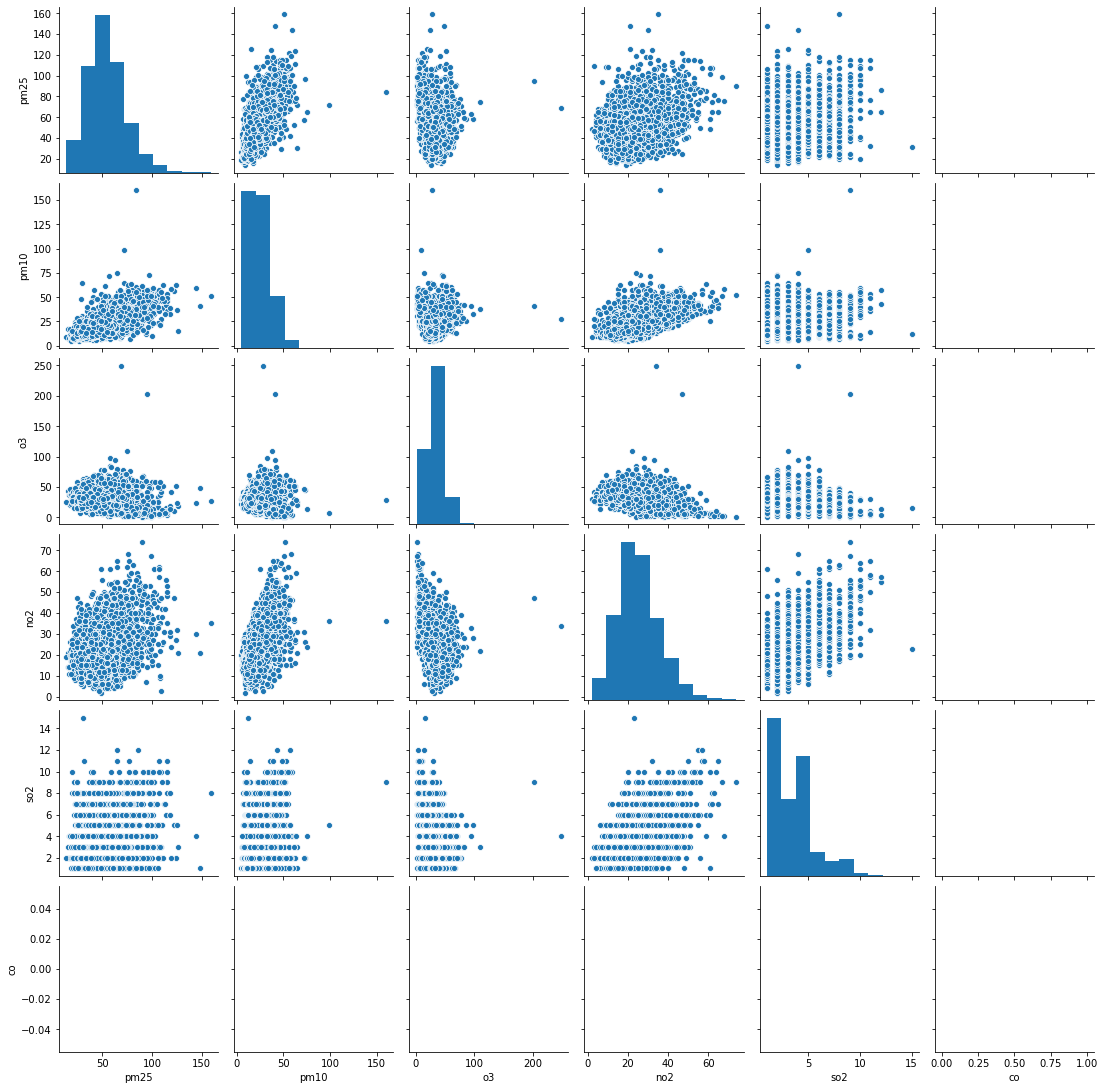

In [5]:
sns.pairplot(dfContaminacion)

In [6]:
dfContaminacion['date'].describe()

count                    2424
unique                   2424
top       2019-07-06 00:00:00
freq                        1
first     2013-12-31 00:00:00
last      2020-12-14 00:00:00
Name: date, dtype: object

In [7]:
# Filtro por fecha
dfContaminacion2018 = dfContaminacion[(dfContaminacion['date'] >= '2018-01-01') & (dfContaminacion['date'] < '2019-01-01')]
print(dfContaminacion2018.shape)
dfContaminacion2018.head()


(282, 7)


,date,pm25,pm10,o3,no2,so2,co
712,2018-10-01,47.0,25.0,30.0,29.0,2.0,NaN
713,2018-10-02,40.0,32.0,28.0,34.0,2.0,NaN
714,2018-10-03,44.0,35.0,33.0,41.0,2.0,NaN
715,2018-10-04,52.0,39.0,41.0,45.0,3.0,NaN
716,2018-10-05,67.0,39.0,45.0,40.0,2.0,NaN


In [8]:
# Filtro por fecha
dfContaminacion2019 = dfContaminacion[(dfContaminacion['date'] >='2019-01-01') & (dfContaminacion['date'] < '2020-01-01')]
print(dfContaminacion2018.shape)
dfContaminacion2018.head()


(282, 7)


,date,pm25,pm10,o3,no2,so2,co
712,2018-10-01,47.0,25.0,30.0,29.0,2.0,NaN
713,2018-10-02,40.0,32.0,28.0,34.0,2.0,NaN
714,2018-10-03,44.0,35.0,33.0,41.0,2.0,NaN
715,2018-10-04,52.0,39.0,41.0,45.0,3.0,NaN
716,2018-10-05,67.0,39.0,45.0,40.0,2.0,NaN


Volvemos a pintar los valores, pero esta vez del año 2018

In [9]:
#sns.pairplot(dfContaminacion2018)

In [10]:
#Miramos la correlación entre datos del 2018
dfContaminacion2018.corr()**2

,pm25,pm10,o3,no2,so2,co
pm25,1.000000,0.566275,0.031996,0.020260,0.002160,NaN
pm10,0.566275,1.000000,0.053699,0.109320,0.001653,NaN
o3,0.031996,0.053699,1.000000,0.068271,0.167877,NaN
no2,0.020260,0.109320,0.068271,1.000000,0.137291,NaN
so2,0.002160,0.001653,0.167877,0.137291,1.000000,NaN
co,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Miramos la correlación entre datos del 2019
dfContaminacion2019.corr()**2

,pm25,pm10,o3,no2,so2,co
pm25,1.000000,0.498270,0.004859,0.135831,0.048077,NaN
pm10,0.498270,1.000000,0.000725,0.272058,0.137222,NaN
o3,0.004859,0.000725,1.000000,0.059558,0.000736,NaN
no2,0.135831,0.272058,0.059558,1.000000,0.168206,NaN
so2,0.048077,0.137222,0.000736,0.168206,1.000000,NaN
co,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Se ha comentado al no aportar valor
#print(dfContaminacion2018.corr(method='pearson'))

Eliminamos los valores nulos sustituyéndolos por el valor correspondiente

In [13]:
from sklearn.impute import SimpleImputer
import numpy as numpy


imputerNanValuesToMean = SimpleImputer(missing_values=numpy.nan, strategy='mean')
imputerNanValuesToMedian = SimpleImputer(missing_values=numpy.nan, strategy='median')
imputerNanValuesToMode = SimpleImputer(strategy="most_frequent")

In [14]:
#Para el año 2018
imputerNanValuesToMean.fit_transform(dfContaminacion2018['pm25'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['pm10'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['o3'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['no2'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2018['so2'].values.reshape(-1,1))
#Para el año 2019
imputerNanValuesToMean.fit_transform(dfContaminacion2019['pm25'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['pm10'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['o3'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['no2'].values.reshape(-1,1))
imputerNanValuesToMean.fit_transform(dfContaminacion2019['so2'].values.reshape(-1,1))

array([[ 1.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 3.        ],
       [ 3.        ],
       [ 3.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 4.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 1.        ],
       [ 2.        ],
       [ 2.        ],
       [ 3.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 4.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 2.        ],
       [ 3.        ],
       [ 3.        ],
       [ 5.        ],
       [ 3.        ],
       [ 2

In [15]:
print("dfContaminacion2018",dfContaminacion2018.shape)
print("dfContaminacion2018",dfContaminacion2019.shape)

dfContaminacion2018 (282, 7)
dfContaminacion2018 (364, 7)


Comprobamos la cantidad de valores nulos que tenemos


In [16]:
print("dfContaminacion2018",dfContaminacion2018.isnull().sum())
print("dfContaminacion2018",dfContaminacion2019.isnull().sum())

dfContaminacion2018 date      0
pm25      2
pm10      2
o3        2
no2       2
so2       2
co      282
dtype: int64
dfContaminacion2018 date      0
pm25      1
pm10      1
o3        1
no2       1
so2       5
co      364
dtype: int64


Miramos la distribución de nuestros datos


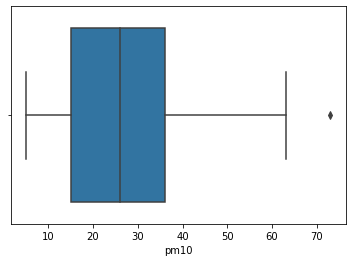

In [17]:
from seaborn import boxplot
boxplot(dfContaminacion2018.pm10)

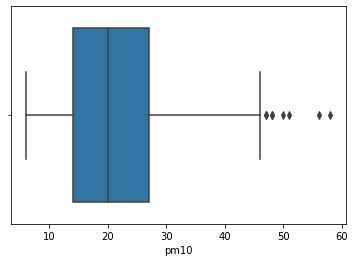

In [18]:
from seaborn import boxplot
boxplot(dfContaminacion2019.pm10)

In [19]:
q1=dfContaminacion2018['pm25'].quantile(0.25)
q2=dfContaminacion2018['pm25'].quantile(0.5)
IQ = q2-q1
#limiteSuperior = dfContaminacion2018['pm25'].quantile(0.75)
limiteSuperior = q1+1.5*IQ
limiteInferior = q2-1.5*IQ

print ("limite Superior",limiteSuperior, dfContaminacion2018.shape)
print ("limite inferior",limiteInferior, dfContaminacion2019.shape)



limite Superior 66.625 (282, 7)
limite inferior 36.125 (364, 7)


### No hacemos un drop de los valores que se salen de los cuartiles, puesto que más adelante se puede ver que realmente son significativos para nosotros

In [20]:
#dfContaminacion2018 = dfContaminacion2018.drop(dfContaminacion2018.loc[dfContaminacion2018['pm10'] > limiteSuperior].index)
#dfContaminacion2018 = dfContaminacion2018.drop(dfContaminacion2018.loc[dfContaminacion2018['pm10'] < limiteInferior].index)
#print(dfContaminacion2018.shape)

#dfContaminacion2019 = dfContaminacion2019.drop(dfContaminacion2019.loc[dfContaminacion2019['pm10'] > limiteSuperior].index)
#dfContaminacion2019 = dfContaminacion2019.drop(dfContaminacion2019.loc[dfContaminacion2019['pm10'] < limiteInferior].index)
#print(dfContaminacion2019.shape)


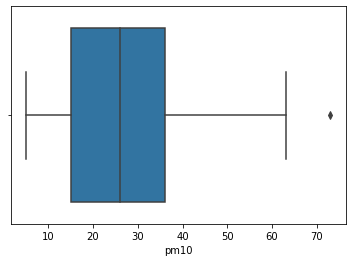

In [21]:
boxplot(dfContaminacion2018.pm10)

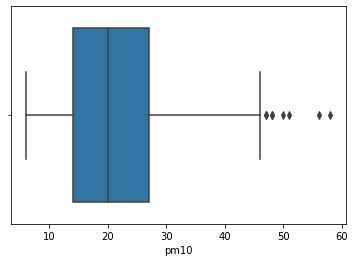

In [22]:
boxplot(dfContaminacion2019.pm10)

In [23]:
dfContaminacion2018.drop(['co'], axis = 1)
dfContaminacion2019.drop(['co'], axis = 1)

,date,pm25,pm10,o3,no2,so2
349,2019-10-01,58.0,20.0,32.0,17.0,1.0
350,2019-10-02,51.0,17.0,24.0,33.0,2.0
351,2019-10-03,46.0,24.0,31.0,38.0,2.0
352,2019-10-04,49.0,24.0,36.0,26.0,2.0
353,2019-10-05,45.0,21.0,35.0,27.0,2.0
...,...,...,...,...,...,...
708,2019-03-28,49.0,25.0,43.0,28.0,4.0
709,2019-03-29,47.0,29.0,46.0,20.0,4.0
710,2019-03-30,43.0,27.0,31.0,19.0,4.0
711,2019-03-31,49.0,14.0,30.0,26.0,4.0


Concatenamos los datos del 2018 y el 2019

In [24]:
dfContaminacion2018_2019 = pd.concat([dfContaminacion2018, dfContaminacion2019])
dfContaminacion2018_2019.index = dfContaminacion2018_2019['date']
dfContaminacion2018_2019['year'] = dfContaminacion2018_2019.index.year
dfContaminacion2018_2019.drop(['co'], axis = 1)

print(dfContaminacion2018_2019.head())


                 date  pm25  pm10    o3   no2  so2  co  year
date                                                        
2018-10-01 2018-10-01  47.0  25.0  30.0  29.0  2.0 NaN  2018
2018-10-02 2018-10-02  40.0  32.0  28.0  34.0  2.0 NaN  2018
2018-10-03 2018-10-03  44.0  35.0  33.0  41.0  2.0 NaN  2018
2018-10-04 2018-10-04  52.0  39.0  41.0  45.0  3.0 NaN  2018
2018-10-05 2018-10-05  67.0  39.0  45.0  40.0  2.0 NaN  2018


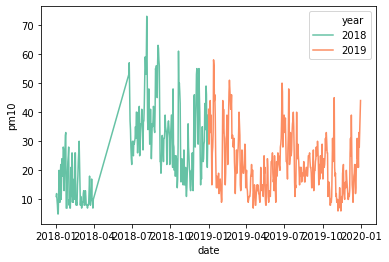

In [25]:
from seaborn import lineplot
from seaborn import relplot

from seaborn import distplot


sns.lineplot(x='date', y='pm10', hue= 'year', palette= 'Set2', data=dfContaminacion2018_2019.sort_values(by=['year']));

#sns.lineplot(x='month-day', y='pm10', hue= 'year', palette= 'Set2', data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.sort_values(by=['year','month-day']));
#sns.relplot(x=dfContaminacion2018.date, y=dfContaminacion2018.pm10,kind = 'line', data=dfContaminacion2018)


In [26]:
#import matplotlib.pyplot as plt
#ax = plt.subplot()
#ax.plot(kind = 'line', x = dfContaminacion2018.date, y = dfContaminacion2018['pm10'])
#ax.plot(kind = 'line', x = dfContaminacion2019.date, y = dfContaminacion2019['pm10'])

In [27]:
#dfContaminacion2018['pm10'].plot()
#dfContaminacion2019['pm10'].plot(ax=ax)

### Creamos un  fichero con los datos de Contaminación de Madrid de los años 2018 y 2019

In [28]:
print(dfContaminacion2019.shape)
print(dfContaminacion2018.shape)

(364, 7)
(282, 7)


In [29]:
try:
    dfContaminacion2018_2019.to_csv('/home/carlos/Proyectos/Python/ProyectoFinal/ProyectoBigData/datosContaminacionMadrid/JupiterNoteBook/contaminacionMadrid2018_2019.csv', columns =['date','pm10','year'], sep=";", encoding = 'utf-8', index='date')
except:
    print("Error al crear el fichero csv")

### Ahora cargamos los datos metereológicos para Madrid


In [30]:
dfMeteoMadrid = pd.read_csv('~/Proyectos/Python/ProyectoFinal/ProyectoBigData/datosContaminacionMadrid/JupiterNoteBook/df_sinhoras_estacion_datos_diarios_mad-Copy1.csv')


In [31]:
print(dfMeteoMadrid.columns)
dfMeteoMadrid.head

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of            fecha indicativo                        nombre provincia  altitud  \
0     2018-01-01       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   
1     2018-01-02       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   
2     2018-01-03       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   
3     2018-01-04       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   
4     2018-01-05       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   
...          ...        ...                           ...       ...      ...   
2181  2019-12-27      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   
2182  2019-12-28      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   
2183  2019-12-29      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   
2184  2019-12-30      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   
2185  2019-12-31      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   

      tme

### Nos aseguramos de que el dataframe cargado del csv de los datos meteorológicos utilza la fecha como índice. De esta forma el mergeo se hará conforme a dichos índices.

In [32]:
dfMeteoMadrid.index = dfMeteoMadrid['fecha']

In [33]:
dfMergeado = pd.merge(dfContaminacion2018_2019, dfMeteoMadrid, left_index=True, right_index=True)

In [34]:
print(dfMergeado.columns)
dfMergeado.head

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'year_x', 'fecha',
       'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin',
       'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year_y', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of                  date  pm25  pm10    o3   no2   so2  co  year_x       fecha  \
2018-01-01 2018-01-01  32.0  11.0  31.0  23.0   3.0 NaN    2018  2018-01-01   
2018-01-01 2018-01-01  32.0  11.0  31.0  23.0   3.0 NaN    2018  2018-01-01   
2018-01-01 2018-01-01  32.0  11.0  31.0  23.0   3.0 NaN    2018  2018-01-01   
2018-01-02 2018-01-02  31.0  12.0  15.0  23.0  15.0 NaN    2018  2018-01-02   
2018-01-02 2018-01-02  31.0  12.0  15.0  23.0  15.0 NaN    2018  2018-01-02   
...               ...   ...   ...   ...   ...   ...  ..     ...         ...   
2019-12-29 2019-12-29  75.0   NaN   NaN   NaN   NaN NaN    2019  2019-12-29   
2019-12-29 2019-12-29  75.0   NaN   NaN   NaN   NaN NaN    2019  2019-12-29   
2019-12-31 2019-12-31   NaN  44.0   5.0  34.0   4.0 NaN    2019  2019-12-31   
2019-12-31 2019-12-31   NaN  44.0   5.0  34.0   4.0 NaN    2019  2019-12-31   
2019-12-31 2019-12-31   NaN  44.0   5.0  34.0   4.0 NaN    2019  2019-12-31   

           indicativo

In [35]:
try:
    dfMergeado.to_csv('/home/carlos/Proyectos/Python/ProyectoFinal/ProyectoBigData/datosContaminacionMadrid/JupiterNoteBook/merge.csv', columns =['date','pm10','fecha','indicativo','velmedia','racha','sol','presmax','presmin','season_name'], sep=";", encoding = 'utf-8', index='date')
except KeyError as error:
    print("Error al crear el fichero csv", error)

In [36]:
dfMergeMadrid = pd.read_csv('~/Proyectos/Python/ProyectoFinal/ProyectoBigData/datosContaminacionMadrid/JupiterNoteBook/merge.csv' , delimiter=';')

In [37]:
print(dfMergeMadrid.shape)
dfMergeMadrid.drop('indicativo', axis='columns', inplace=True)
dfMergeMadrid.drop('fecha', axis='columns', inplace=True)


print("Las columnas del df son: --> ",dfMergeMadrid.columns)
print("Este es el encabezado -->",dfMergeMadrid.head())
print("Nulos del df -->",dfMergeMadrid.isnull().sum())

(1934, 11)
Las columnas del df son: -->  Index(['Unnamed: 0', 'date', 'pm10', 'velmedia', 'racha', 'sol', 'presmax',
       'presmin', 'season_name'],
      dtype='object')
Este es el encabezado -->    Unnamed: 0        date  pm10  velmedia  racha  sol  presmax  presmin  \
0  2018-01-01  2018-01-01  11.0       5.3   11.9  5.9   952.20    949.3   
1  2018-01-01  2018-01-01  11.0       3.1   10.0  5.9   954.30    950.7   
2  2018-01-01  2018-01-01  11.0       1.7    9.7  5.9   953.25    950.0   
3  2018-01-02  2018-01-02  12.0       4.2   11.9  7.0   952.20    949.6   
4  2018-01-02  2018-01-02  12.0       2.5   11.4  7.0   954.30    952.2   

  season_name  
0      Winter  
1      Winter  
2      Winter  
3      Winter  
4      Winter  
Nulos del df --> Unnamed: 0     0
date           0
pm10           9
velmedia       0
racha          0
sol            0
presmax        0
presmin        0
season_name    0
dtype: int64


Eliminamos los 9 nulos que aparecen en pm10

In [38]:
imputerNanValuesToMean.fit_transform(dfMergeMadrid['pm10'].values.reshape(-1,1))

array([[11.],
       [11.],
       [11.],
       ...,
       [44.],
       [44.],
       [44.]])

In [39]:
print("Nulos del df -->",dfMergeMadrid.isnull().sum())

Nulos del df --> Unnamed: 0     0
date           0
pm10           9
velmedia       0
racha          0
sol            0
presmax        0
presmin        0
season_name    0
dtype: int64


In [40]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


# descripciones, cambia la precisión a 2 sitios
set_option('precision', 1)
print(dfMergeMadrid.describe())

dfMergeMadrid ['date'] = pd.to_numeric(dfMergeMadrid['date'], errors='coerce')

print(dfMergeMadrid.dtypes)

         pm10  velmedia   racha     sol  presmax  presmin
count  1925.0    1934.0  1934.0  1934.0   1934.0   1934.0
mean     24.1       2.4     9.6     8.4    941.4    936.7
std      12.2       1.5     3.6     3.9      6.2      7.2
min       5.0       0.0     2.5     0.0    919.2    905.0
25%      15.0       1.4     6.9     6.1    938.1    933.4
50%      22.0       1.9     9.2     9.3    941.2    937.0
75%      31.0       3.1    11.9    11.0    945.1    940.9
max      73.0      10.8    26.4    13.5    961.9    953.7
Unnamed: 0      object
date           float64
pm10           float64
velmedia       float64
racha          float64
sol            float64
presmax        float64
presmin        float64
season_name     object
dtype: object


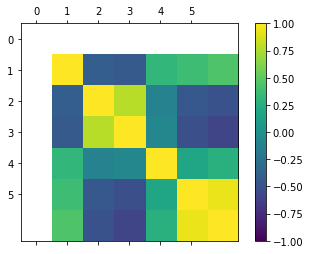

In [41]:

### matriz de correlación
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dfMergeMadrid.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
pyplot.show()

### Test puntual de algoritmos: Línea base

En primera instancia, no tenemos idea de qué algoritmos funcionarán bien en este problema. Una intuición inicial sugiere que los algoritmos de regresión como Regresión lineal y ElasticNet pueden funcionar bien. También es posible que los árboles de decisión e incluso SVM lo hagan bien. No tengo idea. Diseñemos nuestra selección de prueba. 

Vamos a utilizar 10 veces la validación cruzada. El conjunto de datos no es demasiado pequeño y esta es una buena configuración para la selección de la prueba estándar. Evaluaremos los algoritmos utilizando la métrica de **error cuadrático medio (MSE)**. MSE dará una idea general de cuán equivocadas son todas las predicciones (0 es perfecto).

Creamos una **línea de base de rendimiento** en este problema y revisamos una serie de algoritmos diferentes. Seleccionaremos un conjunto de algoritmos diferentes capaces de trabajar en este problema de regresión. Los seis algoritmos seleccionados son:

- **Algoritmos lineales**: Regresión lineal (**LR**), Regresión de lasso (**LASSO**) y ElasticNet (**EN**).
- **Algoritmos no lineales**: árboles de clasificación y regresión (**CART**), Regresión de vectores de soporte (**SVR**) y k-vecinos más cercanos (**KNN**).

In [42]:
X = dfMergeMadrid.iloc[:,3:6]
Y = dfMergeMadrid['date']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

## c) Algoritmos de control/Test puntual. Usaremos 6 tipos:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='scale')))

In [43]:
from sklearn import model_selection
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


try:
    name='Logistic Regression'
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
except ValueError:
    print("*********************************************error",e,"on line",i)

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/home/carlos/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


NameError: name 'model' is not defined